# Classification Algorithms - Attrition Evaluation

In this exercise we will work on the subset of the the synthetic [IBM HR Employees Attrition dataset](https://www.kaggle.com/janiobachmann/attrition-in-an-organization-why-workers-quit/data?select=WA_Fn-UseC_-HR-Employee-Attrition.csv).                                                                                                       

The dataset gives information about the employees in the organization and the target variable (Y) is Attrition, which tells whether an employee was replaced or not.  We will look at the variables and different factors that affect employee performance, including factors like work from home sitaution, job role, monthly income etc.
### Importing the libraries and datasets

In [34]:
#Basics
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#SkLearn ML General
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

#SkLearn ML Algorithms
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm

The original dataset contains around 35 feature variables. We will be using a subset of that and use 14 features in this exercise.

In [35]:
#subset from the original dataset has been stored in this csv file
employee_data = pd.read_csv('HREmployeeData.csv')
employee_data

,Attrition,Age,BusinessTravel,DistanceFromHome,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,1,41,2,1,4,2,5993,1,0,8,1,6,4,0
1,0,49,1,8,2,1,5130,0,1,10,3,10,7,1
2,1,37,2,2,3,2,2090,1,0,7,3,0,0,0
3,0,33,1,3,3,1,2909,1,0,8,3,8,7,3
4,0,27,2,2,2,1,3468,0,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,36,1,23,4,1,2571,0,1,17,3,5,2,0
1466,0,39,2,6,1,1,9991,0,1,9,3,7,7,1
1467,0,27,2,4,2,1,6142,1,1,6,3,6,2,0
1468,0,49,1,2,2,1,5390,0,0,17,2,9,6,0


# Data Exploration

We want to have a quick study of our dataset before we dive into the data analytics part. 

* We want to make sure we fully understand our data
* We want to know how many features are there in our dataset 
* What the distribution of our data is like.

In [36]:
#Descriptive stats for the dataset
employee_data.describe()

,Attrition,Age,BusinessTravel,DistanceFromHome,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,36.923810,1.607483,9.192517,2.728571,1.097279,6502.931293,0.282993,0.793878,11.279592,2.761224,7.008163,4.229252,2.187755
std,0.367863,9.135373,0.665455,8.106864,1.102846,0.730121,4707.956783,0.450606,0.852077,7.780782,0.706476,6.126525,3.623137,3.222430
min,0.000000,18.000000,0.000000,1.000000,1.000000,0.000000,1009.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,1.000000,2.000000,2.000000,1.000000,2911.000000,0.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000
50%,0.000000,36.000000,2.000000,7.000000,3.000000,1.000000,4919.000000,0.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000
75%,0.000000,43.000000,2.000000,14.000000,4.000000,2.000000,8379.000000,1.000000,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000
max,1.000000,60.000000,2.000000,29.000000,4.000000,2.000000,19999.000000,1.000000,3.000000,40.000000,4.000000,40.000000,18.000000,15.000000


We can have a look at the target variable (Attrition) using a histogram plot to see how frequently it's values occur in the data.

TypeError: 'str' object is not callable

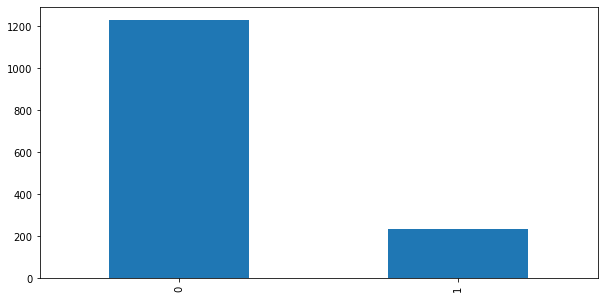

In [37]:
#Plot a Histogram
employee_data.Attrition.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Attrition of Employees')
plt.ylabel('Occurence of each in the dataset')
plt.xlabel('Attrition')

From the plot, we can see that most employees were not replaced, but a few (less than 200) were attritioned.

## Predictive Modelling

X will contain our independent feature variables and y is our target/outcome variable.

In [38]:
#Separate x_inputs from y_target variables
x_inputs = employee_data.drop(['Attrition'], axis=1)
y_target = employee_data['Attrition']

### Test/Train Split

We will split our data with 50% into the training set and the remaining 50% into the test set. 

In [39]:
#split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x_inputs, y_target, test_size=0.5, random_state=0)

Once our dataset is split, we will now initialize each of the classifiers and fit them to our training data. We implement the algorithms we studied in the lectures one after another, using a loop combined with a dictionary.

In [40]:
# Define the classifiers
classifiers = {
    "classifier_NB":    GaussianNB(),
    "classifier_SVM":   SVC(gamma = 2, C = 1),
    "classifier_KNN":   KNeighborsClassifier(n_neighbors = 3),
    "classifier_DT":    DecisionTreeClassifier(random_state = 0),
    "classifier_RF":    RandomForestClassifier(max_depth = 2, random_state = 0)
}
results = {}
print("Number of mislabeled points out of a total %d points:" % X_test.shape[0])
# Train the classifiers on the training set and test classifiers on unseen test data
for clf_name, clf_model in classifiers.items():
    clf_model.fit(X_train, y_train)
    clf_model.predict(X_test)
    print(clf_name + ": %d" % (y_test != clf_model.predict(X_test)).sum())
    results[clf_name] = clf_model.predict(X_test)

Number of mislabeled points out of a total 735 points:
classifier_NB: 104
classifier_SVM: 112
classifier_KNN: 139
classifier_DT: 148
classifier_RF: 109


### Evaluation Metrics
We will use Accuracy, Precision, Recall and F₁ and F₂ score to evaluate our model's performance results using sklearn's metric library.. 

In [41]:
#Print Evaluation Metrics: Accuracy, Precision, Recall, F1 and F2

print("Accuracy Scores:")
for clf_name, clf_model in results.items():
        print(clf_name + ": ", round(metrics.accuracy_score(y_test, clf_model) * 100,4))

print("\nPrecision Scores:")
for clf_name, clf_model in results.items():
        print(clf_name + ": ", round(metrics.precision_score(y_test, clf_model, average = 'weighted') * 100,4))
        
print("\nRecall Scores:")
for clf_name, clf_model in results.items():
        print(clf_name + ": ", round(metrics.recall_score(y_test, clf_model, average = 'weighted') * 100, 4))

print("\nF₁ Scores:")
for clf_name, clf_model in results.items():
        print(clf_name + ": ", 
              round(metrics.f1_score(y_test, clf_model, average = 'weighted', labels = np.unique(clf_model)) * 100, 4)
             )
        
print("\nF₂ Scores:")
for clf_name, clf_model in results.items():
        print(clf_name + ": ", 
              round(metrics.fbeta_score(y_test, clf_model, average = 'weighted', beta = 0.5) * 100,4)
             )

Accuracy Scores:
classifier_NB:  85.8503
classifier_SVM:  84.7619
classifier_KNN:  81.0884
classifier_DT:  79.8639
classifier_RF:  85.1701

Precision Scores:
classifier_NB:  85.6453
classifier_SVM:  71.8458
classifier_KNN:  77.6368
classifier_DT:  80.7356
classifier_RF:  87.3784

Recall Scores:
classifier_NB:  85.8503
classifier_SVM:  84.7619
classifier_KNN:  81.0884
classifier_DT:  79.8639
classifier_RF:  85.1701

F₁ Scores:
classifier_NB:  85.7443
classifier_SVM:  91.7526
classifier_KNN:  79.0409
classifier_DT:  80.278
classifier_RF:  78.7385

F₂ Scores:
classifier_NB:  85.684
classifier_SVM:  74.1042
classifier_KNN:  78.0963
classifier_DT:  80.5476
classifier_RF:  76.198


C:\Users\CFI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Next, we can plot the results on a confusion matrix using [sklearn's plot_confusion_matrix function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix) as we saw in the lecture slides for a visual evaluation.

TypeError: 'str' object is not callable

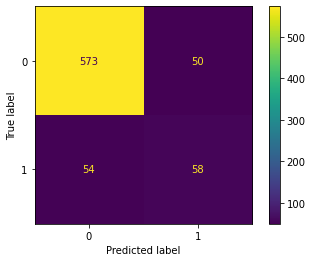

In [42]:
#Display Confusion Matrix For Each Classifier

for clf_name, clf_model in classifiers.items():
    plot_confusion_matrix(clf_model, X_test, y_test)
    plt.title(clf_name)
    plt.tight_layout()

We can see that for both models, they predict mostly '0' label which is the 'Not Attritioned' in our dataset as most of our data was trained for class values '0'. Next we will plot the [ROC curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay). ROC shows the results at different classification thresholds as seen on the curve.

As we saw in the lecture what an ideal classifier looks like (closer to the True Positive Rate), we can see that the classifier in this case seems to be performing well.

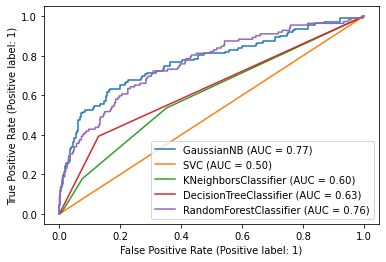

In [61]:
#Plot the ROC Curve
roc_figure,roc_axis=plt.subplots()
for clf_name, clf_model in classifiers.items():
        metrics.plot_roc_curve(clf_model, X_test, y_test, ax=roc_axis)

## END OF NOTEBOOK